## Importing Libraries and Packages 

In [1]:
# import the required packages
#Enable usage of array, list related operations
import numpy as np
#Enable usage of Pandas module in working path
import pandas as pd

#Enable usage of Seaborn data visualization library in python
import seaborn as sns

#import libray that enables splitting data into training sets and test sets.
from sklearn.model_selection import train_test_split


#==================================================================================
#Import various models from their respective packages
#HR Analytics Dataset
#1) import XGBClassifier
from xgboost import XGBClassifier
import xgboost as xgb

#2) import lightgbm model
!pip install lightgbm
import lightgbm as lgb

#3) import KNeighboursClassifier
from sklearn.neighbors import KNeighborsClassifier

#4) import MLPClassifier
from sklearn.neural_network import MLPClassifier
#==================================================================================
#Import various models from their respective packages
#Airbnb Dataset
#1) import linear regression
from sklearn.linear_model import LinearRegression

#2) import XGBoost regressor
from xgboost import XGBRegressor

#3) import support vector machine for support vector regression
from sklearn import svm
#==================================================================================
#import libraries to perform cross validation=
from sklearn.model_selection import cross_val_score, cross_validate

#Importing Hyperparameter tuning technique through GridSearchCV
from sklearn.model_selection import GridSearchCV

#Importing Hyperparameter tuning technique through RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Importing evaluation metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


#import OneHotEncoder to change from Ordinal Encoding
from sklearn.preprocessing import OneHotEncoder

#import evaluation metric for regression problem
#R-squared value
from sklearn.metrics import r2_score
#Mean Squared Error
from sklearn.metrics import mean_squared_error
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error

#Import sqrt to calculate Root Mean Squared Error
from math import sqrt

#import statsmodels python module 
import statsmodels.api as sm

#Ensures that plot outputs appear and are stored within the notebook.
import matplotlib.pyplot as plt
%matplotlib inline

## 1. HR Analytics

### 1.1 Load and Sample the data

In [2]:
#Read hr_data.csv file into dataframe, df_classification
df = pd.read_csv('hr_data_new.csv')
df_classification = df.copy()

### 1.2 Feature Selection by observing Correlation Heatmap

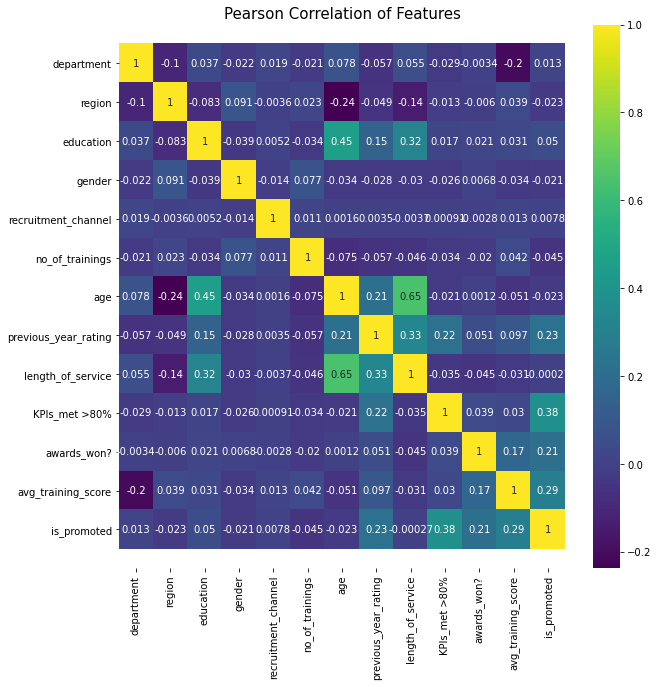

In [3]:
#utilise matplotlib's built-in colormap
colormap = plt.cm.viridis
plt.figure(figsize = (10,10))
plt.title('Pearson Correlation of Features', size = 15)

#Plot a rectangular dataframe as a color-encoded matrix.
ax = sns.heatmap(df_classification.astype(float).corr(), cmap = colormap, annot = True)

#Returns the y-axis view limits.
bottom, top = ax.get_ylim()

# Set the y-axis view limits.
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [4]:
#Feature Selection through correlation matrix heatmap
df_classification = df_classification.drop(['length_of_service', 'recruitment_channel', 
                                            'department','gender', 'region'], axis = 1)

### 1.3 Exploring Data

In [5]:
#Display dataframe, df_classification
df_classification.head()

,education,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1,1,3.583519,5.0,1,0,3.931826,1
1,1,1,3.526361,5.0,1,0,3.951244,1
2,2,1,3.931826,4.0,1,0,3.871201,1
3,1,1,3.332205,0.0,1,1,4.077537,1
4,1,1,3.332205,0.0,0,0,4.127134,1


In [6]:
# Inspect the data inputs by returning the last 5 rows
df_classification.tail()

,education,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
9331,1,2,3.784190,4.0,0,0,4.356709,0
9332,1,1,3.465736,4.0,0,0,4.418841,0
9333,1,1,3.526361,1.0,0,0,4.094345,0
9334,1,1,3.218876,0.0,0,0,4.465908,0
9335,0,1,3.258097,0.0,0,0,4.394449,0


In [7]:
#Return the column labels of the dataframe
df_classification.columns ### Unique Columns in Dataframe

Index(['education', 'no_of_trainings', 'age', 'previous_year_rating',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [8]:
# Return a tuple representing the dimensionality of the DataFrame, df_classification
df_classification.shape

(9336, 8)

In [9]:
#Print information about the DataFrame including the index dtype and columns, non-null values and memory usage.### Identifying Null Values in Dataframe
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   education             9336 non-null   int64  
 1   no_of_trainings       9336 non-null   int64  
 2   age                   9336 non-null   float64
 3   previous_year_rating  9336 non-null   float64
 4   KPIs_met >80%         9336 non-null   int64  
 5   awards_won?           9336 non-null   int64  
 6   avg_training_score    9336 non-null   float64
 7   is_promoted           9336 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 583.6 KB


In [10]:
# Display No of Unqiue Values and Actual Unique Values :

def display_unique(df_classification):
    for column in df_classification.columns :
        #Count number of distinct elements
        print("No of Unique Values in "+column+" Column are : "+str(df_classification[column].nunique()))
        #Get unique values in columns
        print("Actual Unique Values in "+column+" Column are : "+str(df_classification[column].sort_values(ascending=True,na_position='last').unique() ))
        print("")

#Call function to display
display_unique(df_classification)

No of Unique Values in education Column are : 3
Actual Unique Values in education Column are : [0 1 2]

No of Unique Values in no_of_trainings Column are : 7
Actual Unique Values in no_of_trainings Column are : [1 2 3 4 5 6 7]

No of Unique Values in age Column are : 41
Actual Unique Values in age Column are : [3.04452244 3.09104245 3.13549422 3.17805383 3.21887582 3.25809654
 3.29583687 3.33220451 3.36729583 3.40119738 3.4339872  3.4657359
 3.49650756 3.52636052 3.55534806 3.58351894 3.61091791 3.63758616
 3.66356165 3.68887945 3.71357207 3.73766962 3.76120012 3.78418963
 3.80666249 3.8286414  3.8501476  3.87120101 3.8918203  3.91202301
 3.93182563 3.95124372 3.97029191 3.98898405 4.00733319 4.02535169
 4.04305127 4.06044301 4.07753744 4.09434456 4.11087386]

No of Unique Values in previous_year_rating Column are : 6
Actual Unique Values in previous_year_rating Column are : [0. 1. 2. 3. 4. 5.]

No of Unique Values in KPIs_met >80% Column are : 2
Actual Unique Values in KPIs_met >80% C

### 1.4 Checking for Imbalanced Dataset

In [11]:
#Get number of records for each domain value in is_promoted
df_classification['is_promoted'].value_counts()

0    4668
1    4668
Name: is_promoted, dtype: int64

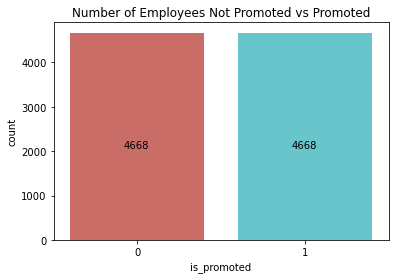

In [12]:
#Plot a countplot to visualize the number of employees that were promoted and not promoted to ensure they are balanced
ax = sns.countplot(data= df_classification, x = "is_promoted", palette = "hls")
plt.title("Number of Employees Not Promoted vs Promoted")

#Annotate countplot to show number of employees promoted vs not promoted
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.32, p.get_height()-2600))

plt.show()

### 1.5 Splitting Dataframe into input and output columns

In [13]:
#Split dataframe into independent (df_x) and dependent variable (df_y)
df_x = df_classification.iloc[:,0:-1]
df_y = df_classification.iloc[:,-1]

In [14]:
#Get name of labels found in df_x
df_x.columns

Index(['education', 'no_of_trainings', 'age', 'previous_year_rating',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [15]:
#view df_y dataframe
df_y

0       1
1       1
2       1
3       1
4       1
       ..
9331    0
9332    0
9333    0
9334    0
9335    0
Name: is_promoted, Length: 9336, dtype: int64

### 1.6 Splitting Training & Testing Data

In [16]:
#Split dataframe into training and testing data with 20% constituting testing data while the remainder constitutes training data
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 42)

### 1.7 Build the Model(s)

### 1.7.1 (XGBoost) eXtreme Gradient Boosting Algorithm

In [17]:
#Create XGBClassifier, with evaluation metric as logloss - 
#Log loss penalizes false classifications by taking into account the probability of classification.
XGB_model = XGBClassifier(use_label_encoder=False, eval_metric = 'logloss')

In [18]:
#Fit function adjusts weights according to data values so that better accuracy can be achieved.
XGB_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [19]:
#Get training and testing accuracy of XGB model
print('Training accuracy is: ', XGB_model.score(x_train,y_train))
print('Testing accuracy is: ', XGB_model.score(x_test,y_test))

Training accuracy is:  0.8346277450455276
Testing accuracy is:  0.7441113490364025


In [20]:
#Display confusion matrix for predicted x_train data
pred_train = XGB_model.predict(x_train)
pd.crosstab(y_train, pred_train, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2908,823,3731
1,412,3325,3737
All,3320,4148,7468


In [21]:
#Display confusion matrix for predicted x_test data
pred_test = XGB_model.predict(x_test)
pd.crosstab(y_test, pred_test, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,639,298,937
1,180,751,931
All,819,1049,1868


In [22]:
# Perform cross validation on XGB model and get list of cross-validated training and testing accuracy
results = cross_validate(XGB_model, df_x, df_y, scoring='accuracy', cv=4, return_train_score = True)
print()
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])


train_score:  [0.83161954 0.83447586 0.83404742 0.83718937]
test_score:  [0.74721508 0.73350471 0.7403599  0.74635818]


In [23]:
# Get cross validated training and testing accuracy
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.834333047700657
cross val testing accuracy is: 0.7418594687232218


### 1.7.1 Improvement - (XGBoost) eXtreme Gradient Boosting Algorithm

In [24]:
#create XGBclassifier model with same parameter
XGB_model = XGBClassifier(use_label_encoder=False, eval_metric = 'logloss')

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 7, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [4, 5, 6],
        'learning_rate' : [0.1, 0.2],
        'n_estimators':[100, 300, 500]
        }

#hyperparameter tuning through randomizedSearchCV
XGB_RandomCV=RandomizedSearchCV(estimator=XGB_model,param_distributions=params,
                             cv=4,n_iter=5,scoring='accuracy',
                             n_jobs=1,verbose=3,return_train_score=True,
                             random_state=121)

#Fit function adjusts weights according to data values so that better accuracy can be achieved.
XGB_RandomCV.fit(df_x, df_y)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[CV 1/4] END colsample_bytree=0.6, gamma=1.5, learning_rate=0.2, max_depth=6, min_child_weight=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV 2/4] END colsample_bytree=0.6, gamma=1.5, learning_rate=0.2, max_depth=6, min_child_weight=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV 3/4] END colsample_bytree=0.6, gamma=1.5, learning_rate=0.2, max_depth=6, min_child_weight=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV 4/4] END colsample_bytree=0.6, gamma=1.5, learning_rate=0.2, max_depth=6, min_child_weight=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV 1/4] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV 2/4] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV 3/4] END colsample_bytree=1.0, gamma

RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=na...
                                           use_label_encoder=False,
                                           validate_parameters=None,
                                           v

In [25]:
#Get Best parameters to build from based on parameter grid values defined previously
XGB_RandomCV.best_params_

{'subsample': 1.0,
 'n_estimators': 100,
 'min_child_weight': 7,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0.5,
 'colsample_bytree': 1.0}

In [26]:
#Build XGB Classifier using best_params_ value
XGB_RandomCV = XGBClassifier(subsample= 1.0,
 n_estimators= 100,
 min_child_weight= 7,
 max_depth= 4,
 learning_rate= 0.1,
 gamma= 0.5,
 colsample_bytree = 1.0, use_label_encoder=False, eval_metric='logloss')

#Fit function adjusts weights according to data values so that better accuracy can be achieved.
XGB_RandomCV.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              enable_categorical=False, eval_metric='logloss', gamma=0.5,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1.0, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [27]:
#Get Training and Testing accuracy
print('Training accuracy of XGB', XGB_RandomCV.score(x_train,y_train))
print('Testing accuracy of XGB', XGB_RandomCV.score(x_test,y_test))

#Get cross-validated training and testing accuracy 
results = cross_validate(XGB_RandomCV, df_x, df_y, scoring='accuracy', cv=4, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

Training accuracy of XGB 0.7698178896625603
Testing accuracy of XGB 0.7617773019271948
cross val training accuracy is: 0.7705298486146815
cross val testing accuracy is: 0.7618894601542416


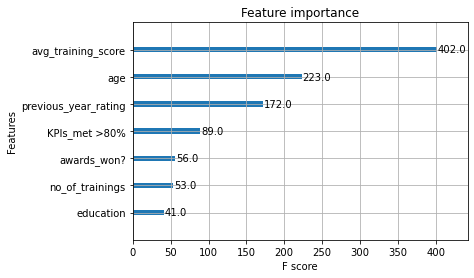

In [28]:
#Plot bar chart to show feature importance (F-Score)
xgb.plot_importance(XGB_RandomCV, ax = plt.gca())
plt.show()

### 1.7.2 (LightGBM) Light Gradient Boosting Machine Classifier 

In [29]:
#Create LightGBM Classifier 
LGB_model = lgb.LGBMClassifier()

#Fit function adjusts weights according to data values so that better accuracy can be achieved.
LGB_model.fit(x_train, y_train)

LGBMClassifier()

In [30]:
# Get Training and testing accuracy of LightGBM model
print('Training accuracy is: ', LGB_model.score(x_train,y_train))
print('Testing accuracy is: ', LGB_model.score(x_test,y_test))

Training accuracy is:  0.7971344402785216
Testing accuracy is:  0.7542826552462527


In [31]:
# Display confusion matrix based on x_train predicted value
pred_train = LGB_model.predict(x_train)
pd.crosstab(y_train, pred_train, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2644,1087,3731
1,428,3309,3737
All,3072,4396,7468


In [32]:
# Display confusion matrix based on x_test predicted value
pred_test = LGB_model.predict(x_test)
pd.crosstab(y_test, pred_test, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,614,323,937
1,136,795,931
All,750,1118,1868


In [33]:
# Perform cross validation on LightGBM model and get list of cross-validated training and testing accuracy
results = cross_validate(LGB_model, df_x, df_y, scoring='accuracy', cv=4, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.79820051 0.80277064 0.7972008  0.80019994]
test_score:  [0.75407027 0.75449871 0.74807198 0.760497  ]


In [34]:
# Get cross validated training and testing accuracy
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.7995929734361611
cross val testing accuracy is: 0.7542844901456727


### 1.7.2 Improvement - (LightGBM) Light Gradient Boosting Machine Classifier 

In [35]:
#Create lightGBM models with default parameters
LGBM_model = lgb.LGBMClassifier()

# A parameter grid for LGBM
params = {
        'learning_rate': [0.05],
        'num_leaves': [90,200],
        'boosting_type' : ['gbdt', 'dart'],
        'objective' : ['binary'],
        'max_depth' : [5,6,7,8],
        'random_state' : [501], 
        'colsample_bytree' : [0.5,0.7],
        'subsample' : [0.5,0.7],
        'min_split_gain' : [0.01],
        'min_data_in_leaf':[10],
        }

#Hyperparameter tuning with RandomizedSearchCV utilized
LGBM_RandomCV=RandomizedSearchCV(estimator=LGBM_model,param_distributions=params,
                             cv=4,n_iter=5,scoring='accuracy',
                             n_jobs=1,verbose=3,return_train_score=True,
                             random_state=121)

#Fit function adjusts weights according to data values so that better accuracy can be achieved.
LGBM_RandomCV.fit(df_x, df_y)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[CV 1/4] END boosting_type=dart, colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_data_in_leaf=10, min_split_gain=0.01, num_leaves=90, objective=binary, random_state=501, subsample=0.7; total time=   0.1s
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[CV 2/4] END boosting_type=dart, colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_data_in_leaf=10, min_split_gain=0.01, num_leaves=90, objective=binary, random_state=501, subsample=0.7; total time=   0.1s
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[CV 3/4] END boosting_type=dart, colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_data_in_leaf=10, min_split_gain=0.01, num_leaves=90,

RandomizedSearchCV(cv=4, estimator=LGBMClassifier(), n_iter=5, n_jobs=1,
                   param_distributions={'boosting_type': ['gbdt', 'dart'],
                                        'colsample_bytree': [0.5, 0.7],
                                        'learning_rate': [0.05],
                                        'max_depth': [5, 6, 7, 8],
                                        'min_data_in_leaf': [10],
                                        'min_split_gain': [0.01],
                                        'num_leaves': [90, 200],
                                        'objective': ['binary'],
                                        'random_state': [501],
                                        'subsample': [0.5, 0.7]},
                   random_state=121, return_train_score=True,
                   scoring='accuracy', verbose=3)

In [36]:
#Get the optimal parameters based on the values in the parameter grid defined
LGBM_RandomCV.best_params_

{'subsample': 0.5,
 'random_state': 501,
 'objective': 'binary',
 'num_leaves': 90,
 'min_split_gain': 0.01,
 'min_data_in_leaf': 10,
 'max_depth': 5,
 'learning_rate': 0.05,
 'colsample_bytree': 0.7,
 'boosting_type': 'dart'}

In [37]:
#Create LighGBM classifier with parameter values from best_params_
LGBM_RandomCV = lgb.LGBMClassifier(subsample = 0.5,
                               random_state = 501,
                               objective = 'binary',
                               num_leaves = 90,
                               min_split_gain = 0.01,
                               min_data_in_leaf = 10,
                               max_depth = 5,
                               learning_rate = 0.05,
                               colsample_bytree = 0.7,
                               boosting_type = 'dart')

#Fit function adjusts weights according to data values so that better accuracy can be achieved.
LGBM_RandomCV.fit(x_train, y_train)

LGBMClassifier(boosting_type='dart', colsample_bytree=0.7, learning_rate=0.05,
               max_depth=5, min_data_in_leaf=10, min_split_gain=0.01,
               num_leaves=90, objective='binary', random_state=501,
               subsample=0.5)

In [38]:
# Get Training and Testing accuracy of improved LightGBM model
print('Training accuracy LightGBM:',LGBM_RandomCV.score(x_train,y_train))
print('Testing accuracy LightGBM:', LGBM_RandomCV.score(x_test,y_test))

# Get Cross-validated Training and Testing accuracy of improved LightGBM model
results = cross_validate(LGBM_RandomCV, df_x, df_y, scoring='accuracy', cv=4, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

Training accuracy LightGBM: 0.7680771290840921
Testing accuracy LightGBM: 0.7649892933618844
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
cross val training accuracy is: 0.7694587260782634
cross val testing accuracy is: 0.7617823479005998


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

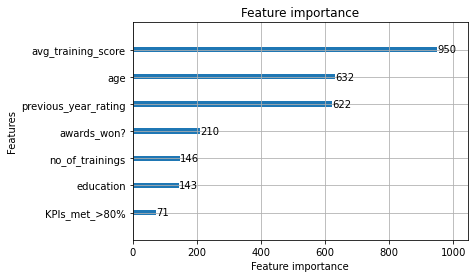

In [39]:
#plot bar chart to show feature importance (i.e. f-score)
lgb.plot_importance(LGBM_RandomCV, ax = plt.gca())

### 1.7.3 (KNN) K-Nearest Neighbors Algorithm

In [40]:
#Observe the accuracies for different values of k

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test)

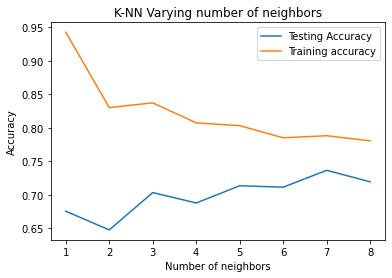

In [41]:
#Generate line plots for training and testing accuracy of various k values
plt.title('K-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [42]:
# We can observe above that we get maximum testing accuracy for k=7.
# So lets create a KNeighborsClassifier with number of neighbors as 7.

In [43]:
#Setup a knn classifier with k neighbors
KNN_model = KNeighborsClassifier(n_neighbors=7)
#Fit the model
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [44]:
#Get training and testing accuracy of K-Nearest Neighbor model based on optimal k value
print('Training accuracy is: ', KNN_model.score(x_train,y_train))
print('Testing accuracy is: ', KNN_model.score(x_test,y_test))

Training accuracy is:  0.7881628280664167
Testing accuracy is:  0.7366167023554604


In [45]:
#let us get the predictions using the classifier we had fit above
pred_train = KNN_model.predict(x_train)
pd.crosstab(y_train, pred_train, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2794,937,3731
1,645,3092,3737
All,3439,4029,7468


In [46]:
#let us get the predictions using the classifier we had fit above
pred_test = KNN_model.predict(x_test)
pd.crosstab(y_test, pred_test, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,640,297,937
1,195,736,931
All,835,1033,1868


In [47]:
#get cross-validated training and testing accuracy in a list
results = cross_validate(KNN_model, df_x, df_y, scoring='accuracy', cv=4, return_train_score = True)
print()
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])


train_score:  [0.795487   0.79034562 0.79005998 0.7840617 ]
test_score:  [0.72579263 0.72536418 0.71893745 0.73179092]


In [48]:
# get cross-validated training and testing accuracy by taking the average value
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.7899885746929449
cross val testing accuracy is: 0.7254712939160239


### 1.7.3 Improvement (KNN) K-Nearest Neighbors Algorithm

In [49]:
#create param_grid to test values as part of hyperparameter tuning throuhg GridSearchCV
param_grid = {'n_neighbors':np.arange(1, 50, 5), 'leaf_size':np.arange(10, 30, 5), 'p':[1,2]}

In [50]:
#Create K-Nearest Neighbor Classifier
KNN_model = KNeighborsClassifier()

#Hyperparamter tuning through GridSearchCV
KNNGridSearchCV = GridSearchCV(KNN_model, param_grid, cv=4)
KNNGridSearchCV.fit(df_x, df_y)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': array([10, 15, 20, 25]),
                         'n_neighbors': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46]),
                         'p': [1, 2]})

In [51]:
# Get best parameters 
KNNGridSearchCV.best_params_

{'leaf_size': 10, 'n_neighbors': 31, 'p': 1}

In [52]:
# Create KNN model using optimal hyperparameters
KNN_GridSearchCV = KNeighborsClassifier(leaf_size = 10, n_neighbors = 31, p = 1)

#Fit function adjusts weights according to data values so that better accuracy can be achieved.
KNN_GridSearchCV.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=31, p=1)

In [53]:
# Get Training and Testing accuracy of KNN optimized model
print('***Final Model***')
print('training acc: ', KNN_GridSearchCV.score(x_train,y_train))
print('testing acc: ', KNN_GridSearchCV.score(x_test,y_test))

#Get cross-validated Training and testing accuracy
results = cross_validate(KNN_GridSearchCV, df_x, df_y, scoring='accuracy', cv=4, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.7580342795929298
testing acc:  0.7441113490364025
cross val training accuracy is: 0.757997714938589
cross val testing accuracy is: 0.7503213367609255


### 1.7.4 (MLP) Multilayer Perceptron Classifier

In [54]:
#Create ANN model
MLP_model = MLPClassifier(activation = 'relu', max_iter = 5000, hidden_layer_sizes = (45, 30, 15), 
                          solver = 'sgd', random_state = 2)
# Fit the model to the training set
MLP_model.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(45, 30, 15), max_iter=5000, random_state=2,
              solver='sgd')

In [55]:
# calculated the training accuracy
print(MLP_model.score(x_train, y_train), '(Train Accuracy)')
# calculated the testing accuracy
print(MLP_model.score(x_test, y_test), '(Test Accuracy)')

0.7489287627209427 (Train Accuracy)
0.7537473233404711 (Test Accuracy)


In [56]:
# Create confusion matrix based on x_train predicted value
pred_train = MLP_model.predict(x_train)
pd.crosstab(y_train, pred_train, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2423,1308,3731
1,567,3170,3737
All,2990,4478,7468


In [57]:
# Create confusion matrix based on x_test predicted value
pred_test = MLP_model.predict(x_test)
pd.crosstab(y_test, pred_test, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,605,332,937
1,128,803,931
All,733,1135,1868


In [58]:
#Cross-validation training and testing accuracy 
results = cross_validate(MLP_model, df_x, df_y, scoring='accuracy', cv=4, return_train_score = True)
print()
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])


train_score:  [0.74507284 0.73650386 0.73393316 0.73578977]
test_score:  [0.73264781 0.73693231 0.71251071 0.75621251]


In [59]:
#Cross validation training and testing accuracy based on average on values obtained
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.7378249071693802
cross val testing accuracy is: 0.7345758354755784


### 1.7.4 Improvement - (MLP) Multilayer Perceptron Classifier

In [60]:
#Create Multi-layer Perceptron classifier with default parameters to begin with
MLP_model = MLPClassifier(max_iter = 1000)

#Creating a dictionary of hyperparameter values to search
param_grid = {
    'hidden_layer_sizes': [(5,2), (16,4,2), (10,5)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
}

#n_jobs = -1, using all processors
#Verbose = 2 , the computation time for each fold and parameter
#candidate is displayed
#scoring - how the model is evaluated
gs = GridSearchCV(MLP_model, param_grid, n_jobs = -1, cv = 4,
                         scoring = 'accuracy', refit = 'f1',verbose = 2)

gs = gs.fit(df_x, df_y)
#get the best score
print('Score: ', gs.best_score_)
#get the best parameters
print('Parameters: ', gs.best_params_)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
Score:  0.7467866323907455
Parameters:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (16, 4, 2), 'solver': 'adam'}


In [61]:
#Hyperparameter tuning through GridSearchCV
MLP_GridSearchCV = MLPClassifier(activation= 'tanh', alpha = 0.0001, hidden_layer_sizes= (16, 4, 2),
                                 solver ='adam', max_iter = 1000)

MLP_GridSearchCV.fit(x_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(16, 4, 2), max_iter=1000)

In [62]:
#Training and Testing accuracy
print('Training accuracy MLP: ', MLP_GridSearchCV.score(x_train,y_train))
print('Testing accuracy MLP: ', MLP_GridSearchCV.score(x_test,y_test))
results = cross_validate(MLP_GridSearchCV, df_x, df_y, scoring='accuracy', cv=4, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

Training accuracy MLP:  0.7554900910551687
Testing accuracy MLP:  0.7596359743040685
cross val training accuracy is: 0.7452156526706655
cross val testing accuracy is: 0.743573264781491


## 2. Airbnb

### 2.1 Change listings.csv from Ordinal Encoding to One Hot Encoding

In [63]:
#Read listings.csv file into dataframe, df_regression
df = pd.read_csv('listings_new_OneHotEncoding.csv')
df_regression = df.copy()

In [64]:
#Check the datatype of features in the listing.csv dataset
df.dtypes

neighbourhood_group                object
neighbourhood                      object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                         int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [65]:
#Create OneHotEncoder and transform neighbourhood_group, neighbourhood, and room_type into dummy variables
ohe = OneHotEncoder()
ohe.fit_transform(df[["neighbourhood_group", "neighbourhood", "room_type"]]).toarray()

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [66]:
feature_arry = ohe.fit_transform(df[["neighbourhood_group", "neighbourhood", "room_type"]]).toarray()

In [67]:
ohe.categories_

[array(['Central Region', 'East Region', 'West Region'], dtype=object),
 array(['Bedok', 'Bishan', 'Bukit Batok', 'Bukit Merah', 'Bukit Panjang',
        'Bukit Timah', 'Choa Chu Kang', 'Clementi', 'Downtown Core',
        'Geylang', 'Jurong East', 'Jurong West', 'Kallang',
        'Marine Parade', 'Museum', 'Newton', 'Novena', 'Orchard', 'Outram',
        'Pasir Ris', 'Queenstown', 'River Valley', 'Rochor',
        'Singapore River', 'Southern Islands', 'Tampines', 'Tanglin',
        'Toa Payoh', 'Western Water Catchment'], dtype=object),
 array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)]

In [68]:
feature_labels = ohe.categories_

In [69]:
np.concatenate(feature_labels)

array(['Central Region', 'East Region', 'West Region', 'Bedok', 'Bishan',
       'Bukit Batok', 'Bukit Merah', 'Bukit Panjang', 'Bukit Timah',
       'Choa Chu Kang', 'Clementi', 'Downtown Core', 'Geylang',
       'Jurong East', 'Jurong West', 'Kallang', 'Marine Parade', 'Museum',
       'Newton', 'Novena', 'Orchard', 'Outram', 'Pasir Ris', 'Queenstown',
       'River Valley', 'Rochor', 'Singapore River', 'Southern Islands',
       'Tampines', 'Tanglin', 'Toa Payoh', 'Western Water Catchment',
       'Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [70]:
feature_labels = np.concatenate(feature_labels)

In [71]:
print(feature_labels)

['Central Region' 'East Region' 'West Region' 'Bedok' 'Bishan'
 'Bukit Batok' 'Bukit Merah' 'Bukit Panjang' 'Bukit Timah' 'Choa Chu Kang'
 'Clementi' 'Downtown Core' 'Geylang' 'Jurong East' 'Jurong West'
 'Kallang' 'Marine Parade' 'Museum' 'Newton' 'Novena' 'Orchard' 'Outram'
 'Pasir Ris' 'Queenstown' 'River Valley' 'Rochor' 'Singapore River'
 'Southern Islands' 'Tampines' 'Tanglin' 'Toa Payoh'
 'Western Water Catchment' 'Entire home/apt' 'Private room' 'Shared room']


In [72]:
features = pd.DataFrame(feature_arry, columns = feature_labels)
features

,Central Region,East Region,West Region,Bedok,Bishan,Bukit Batok,Bukit Merah,Bukit Panjang,Bukit Timah,Choa Chu Kang,...,Rochor,Singapore River,Southern Islands,Tampines,Tanglin,Toa Payoh,Western Water Catchment,Entire home/apt,Private room,Shared room
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7013,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [73]:
print(features)

      Central Region  East Region  West Region  Bedok  Bishan  Bukit Batok  \
0                1.0          0.0          0.0    0.0     0.0          0.0   
1                0.0          1.0          0.0    0.0     0.0          0.0   
2                0.0          1.0          0.0    0.0     0.0          0.0   
3                0.0          1.0          0.0    0.0     0.0          0.0   
4                0.0          1.0          0.0    0.0     0.0          0.0   
...              ...          ...          ...    ...     ...          ...   
7012             1.0          0.0          0.0    0.0     0.0          0.0   
7013             1.0          0.0          0.0    0.0     0.0          0.0   
7014             1.0          0.0          0.0    0.0     0.0          0.0   
7015             1.0          0.0          0.0    0.0     0.0          0.0   
7016             1.0          0.0          0.0    0.0     0.0          0.0   

      Bukit Merah  Bukit Panjang  Bukit Timah  Choa Chu Kang  .

In [74]:
features.head()

,Central Region,East Region,West Region,Bedok,Bishan,Bukit Batok,Bukit Merah,Bukit Panjang,Bukit Timah,Choa Chu Kang,...,Rochor,Singapore River,Southern Islands,Tampines,Tanglin,Toa Payoh,Western Water Catchment,Entire home/apt,Private room,Shared room
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [75]:
pd.concat([df, features], axis = 1)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,...,Rochor,Singapore River,Southern Islands,Tampines,Tanglin,Toa Payoh,Western Water Catchment,Entire home/apt,Private room,Shared room
0,Central Region,Bukit Timah,Private room,81,90,18,2597,0.28,1,365,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,East Region,Tampines,Private room,206,1,14,908,0.15,9,353,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,East Region,Tampines,Private room,94,1,22,922,0.22,9,355,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,East Region,Tampines,Private room,104,1,39,904,0.38,9,346,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,East Region,Tampines,Private room,208,1,25,925,0.25,9,172,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7012,Central Region,Queenstown,Entire home/apt,100,3,0,953,0.00,31,61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7013,Central Region,Queenstown,Entire home/apt,100,3,0,953,0.00,31,61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7014,Central Region,Kallang,Private room,58,30,0,953,0.00,3,173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7015,Central Region,River Valley,Private room,56,14,0,953,0.00,2,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
#concatentate the orginal datafarme with the features that have been One-Hot-Encoded
df_new = pd.concat([df, features], axis = 1)

In [77]:
#View all columns of the new dataframe
df_new.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Central Region', 'East Region', 'West Region',
       'Bedok', 'Bishan', 'Bukit Batok', 'Bukit Merah', 'Bukit Panjang',
       'Bukit Timah', 'Choa Chu Kang', 'Clementi', 'Downtown Core', 'Geylang',
       'Jurong East', 'Jurong West', 'Kallang', 'Marine Parade', 'Museum',
       'Newton', 'Novena', 'Orchard', 'Outram', 'Pasir Ris', 'Queenstown',
       'River Valley', 'Rochor', 'Singapore River', 'Southern Islands',
       'Tampines', 'Tanglin', 'Toa Payoh', 'Western Water Catchment',
       'Entire home/apt', 'Private room', 'Shared room'],
      dtype='object')

In [78]:
df_new.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,...,Rochor,Singapore River,Southern Islands,Tampines,Tanglin,Toa Payoh,Western Water Catchment,Entire home/apt,Private room,Shared room
0,Central Region,Bukit Timah,Private room,81,90,18,2597,0.28,1,365,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,East Region,Tampines,Private room,206,1,14,908,0.15,9,353,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,East Region,Tampines,Private room,94,1,22,922,0.22,9,355,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,East Region,Tampines,Private room,104,1,39,904,0.38,9,346,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,East Region,Tampines,Private room,208,1,25,925,0.25,9,172,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### 2.2 Performing Feature Scaling as Per continuation of Assignment 1

In [79]:
#Perform log transformation on the reviews per month column 
df_new.reviews_per_month = np.log1p(df_new.reviews_per_month)

#Perform log transformation on the number of reviews column 
df_new.number_of_reviews = np.log1p(df_new.number_of_reviews)

#Perform log transformation on the minimum_nights column 
df_new.minimum_nights = np.log1p(df_new.minimum_nights)

#Perform log transformation on the Calculated Host Listings Count 
df_new.calculated_host_listings_count = np.log1p(df_new.calculated_host_listings_count)

#Perform log transformation on the Calculated Host Listings Count 
df_new.availability_365 = np.log1p(df_new.availability_365)

### 2.3 Splitting Dataframe into input and output columns

In [80]:
df_y = df_new['price']
df_x = df_new.drop(['price', 'neighbourhood_group', 'neighbourhood', 'room_type'], axis = 1)

In [81]:
x_train,x_test,y_train,y_test=train_test_split(df_x, df_y, test_size=0.3, random_state=105)

In [82]:
df_x.columns

Index(['minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Central Region', 'East Region', 'West Region',
       'Bedok', 'Bishan', 'Bukit Batok', 'Bukit Merah', 'Bukit Panjang',
       'Bukit Timah', 'Choa Chu Kang', 'Clementi', 'Downtown Core', 'Geylang',
       'Jurong East', 'Jurong West', 'Kallang', 'Marine Parade', 'Museum',
       'Newton', 'Novena', 'Orchard', 'Outram', 'Pasir Ris', 'Queenstown',
       'River Valley', 'Rochor', 'Singapore River', 'Southern Islands',
       'Tampines', 'Tanglin', 'Toa Payoh', 'Western Water Catchment',
       'Entire home/apt', 'Private room', 'Shared room'],
      dtype='object')

In [83]:
df_y

0        81
1       206
2        94
3       104
4       208
       ... 
7012    100
7013    100
7014     58
7015     56
7016     65
Name: price, Length: 7017, dtype: int64

### 2.4 Build the Model(s)

### Linear Regression 

In [84]:
linreg = LinearRegression()
linreg.fit(x_train,y_train.ravel())


y_fitted = linreg.predict(x_train)
y_pred=linreg.predict(x_test)

print('===== Linear Regression =====')
print('R-squared train score: {:.3f}'.format(linreg.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(linreg.score(x_test, y_test)))
print()
print('Train RMSE: %f'% np.sqrt(mean_squared_error(y_train, y_fitted)))
print('Test RMSE: %f'% np.sqrt(mean_squared_error(y_test, y_pred)))
print()
print('Train MAE: %f'% mean_absolute_error(y_train, y_fitted))
print('Test MAE: %f'% mean_absolute_error(y_test, y_pred))

===== Linear Regression =====
R-squared train score: 0.475
R-squared test score: 0.448

Train RMSE: 61.504520
Test RMSE: 62.685780

Train MAE: 46.588757
Test MAE: 47.936033


### Improvement Linear Regression 

In [85]:
# The lm model refers to sklearn model and lm2 model refers to statsmodel.api model
# Create another model lm2 using statsmodel.api: the Ordinary Least Squares (OLS) method and fit function
lm2 = sm.OLS(y_train, x_train).fit()
# Summary statistics from the model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     122.5
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:20:39   Log-Likelihood:                -27197.
No. Observations:                4911   AIC:                         5.447e+04
Df Residuals:                    4874   BIC:                         5.471e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
minimum_nights                   -11.7638      0.806    -14.602      0.000     -13.343     -10.184
number_of_reviews                 -7.8279      1.099     -7.121      0.000      -9.983      -5.673
last_review                        0.0094      0.004      2.607      0.009       0.002       0.017
reviews_per_month                  7.1842      3.463      2.075      0.038       0.395      13.973
calculated_host_listings_count    -1.4310      0.713     -2.006      0.045      -2.829      -0.032
availability_365                   5.9416      0.495     12.000      0.000       4.971       6.912
Central Region                    66.3282      3.378     19.633      0.000      59.705      72.951
East Region                       31.5100      3.688      8.545      0.000      24.281      38.739
West Region                       36.7728      5.121      7.181      0.000      26.733      46.812
Bedok                             24.0010      4.596      5.222      0.000      14.991      33.011
Bishan                           -17.0049     10.023     -1.697      0.090     -36.655       2.645
Bukit Batok                       -0.1689      9.668     -0.017      0.986     -19.122      18.785
Bukit Merah                      -32.9553      3.916     -8.416      0.000     -40.632     -25.279
Bukit Panjang                     -0.4535     12.562     -0.036      0.971     -25.080      24.173
Bukit Timah                       -4.3143      6.481     -0.666      0.506     -17.020       8.391
Choa Chu Kang                     -8.7422      9.513     -0.919      0.358     -27.393       9.908
Clementi                          51.0209      8.484      6.014      0.000      34.388      67.654
Downtown Core                     18.1750      4.195      4.332      0.000       9.951      26.399
Geylang                          -25.9351      3.190     -8.131      0.000     -32.188     -19.682
Jurong East                       18.0829      7.972      2.268      0.023       2.454      33.711
Jurong West                       -2.8555      7.370     -0.387      0.698     -17.304      11.593
Kallang                          -15.8331      3.184     -4.972      0.000     -22.076      -9.591
Marine Parade                    -15.9595      6.094     -2.619      0.009     -27.907      -4.012
Museum                             7.0995      9.423      0.753      0.451     -11.373      25.572
Newton                             0.1401      6.630      0.021      0.983     -12.858      13.138
Novena                            -8.0313      3.812     -2.107      0.035     -15.505      -0.557
Orchard                           46.5979      7.529      6.189      0.000      31.837      61.359
Outram                            -7.6407      3.981     -1.919      0.055     -15.445       0.163
Pasir Ris     

In [86]:
df_x_lm = df_new[["Shared room", "Private room", "Entire home/apt", "Toa Payoh", "Southern Islands", "River Valley",
              "Orchard", "Marine Parade", "Kallang","Geylang", "Downtown Core", "Clementi", "Bukit Merah",
              "Bedok", "West Region", "East Region", "Central Region", "availability_365", "last_review",
              "number_of_reviews", "minimum_nights"]]


df_y_lm = df_new["price"] 

In [87]:
# Task 2: Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
x_train, x_test, y_train, y_test = train_test_split(df_x_lm, df_y_lm, test_size=0.3, random_state=10)

In [88]:
# Taks 3: train the model using training set
lm2 = LinearRegression()

lm2.fit(x_train, y_train)

LinearRegression()

In [89]:
y_fitted = lm2.predict(x_train)
y_pred = lm2.predict(x_test)

print('===== Improved Linear Regression =====')
print('R-squared train score: {:.3f}'.format(lm2.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(lm2.score(x_test, y_test)))
print()
print('Train RMSE: %f'% np.sqrt(mean_squared_error(y_train, y_fitted)))
print('Test RMSE: %f'% np.sqrt(mean_squared_error(y_test, y_pred)))
print()
print('Train MAE: %f'% mean_absolute_error(y_train, y_fitted))
print('Test MAE: %f'% mean_absolute_error(y_test, y_pred))

===== Improved Linear Regression =====
R-squared train score: 0.469
R-squared test score: 0.453

Train RMSE: 61.711603
Test RMSE: 62.794416

Train MAE: 46.792522
Test MAE: 47.576607


### XGBoost Regression Model

In [90]:
x_train,x_test,y_train,y_test=train_test_split(df_x, df_y, test_size=0.3, random_state=105)

xg_reg = XGBRegressor()

xg_reg.fit(x_train, y_train.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [91]:
print('the training Root mean squared error is: ', np.sqrt(mean_squared_error(xg_reg.predict(x_train), y_train)))
print('the testing Root mean squared error is: ', np.sqrt(mean_squared_error(xg_reg.predict(x_test), y_test)))

the training Root mean squared error is:  28.48319386395772
the testing Root mean squared error is:  53.805929181041684


In [92]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(xg_reg, df_x, df_y.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [-886.52007019 -861.06037882 -921.29702798 -928.76625965 -839.50241218]
test_score:  [-3309.809697   -3217.23612942 -3410.75813313 -3740.70616226
 -3855.83089065]


In [93]:
print('cross val training Root mean_squared_error is:', np.sqrt(sum(-results['train_score'])/len(results['train_score'])))
print('cross val testing Root mean_squared_error is:', np.sqrt(sum(-results['test_score'])/len(results['test_score'])))

cross val training Root mean_squared_error is: 29.789750414572545
cross val testing Root mean_squared_error is: 59.218816287506925


In [94]:
print('R-squared train score: {:.3f}'.format(xg_reg.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(xg_reg.score(x_test, y_test)))

R-squared train score: 0.887
R-squared test score: 0.593


### Improvement XGBoost Regression Model

In [95]:
depth_range = range(2,10)

train_mse = []
test_mse = []
cross_val_train_mse =[]
cross_val_test_mse =[]

for d in depth_range:
    # Create XGBRegressor Model
    xg_reg = XGBRegressor(max_depth=d, random_state=1, n_estimators=20)
    xg_reg.fit(x_train, y_train.ravel()) 
    train_mse.append(mean_squared_error(xg_reg.predict(x_train), y_train))
    test_mse.append(mean_squared_error(xg_reg.predict(x_test), y_test))
    
    results  = cross_validate(xg_reg, df_x, df_y.ravel(), scoring='neg_mean_squared_error',
                              cv=5, return_train_score = True)
    cross_val_train_mse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_mse.append(sum(-results['test_score'])/len(results['test_score']))

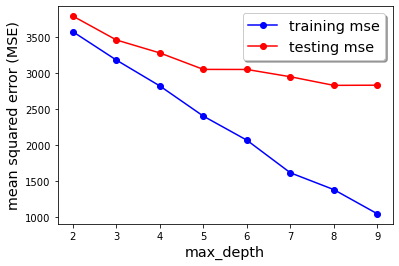

In [96]:
# Plot the simple split measures (train_mse & test_mse) 
plt.plot(depth_range, train_mse, 'bo-', label ='training mse')
plt.plot(depth_range, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

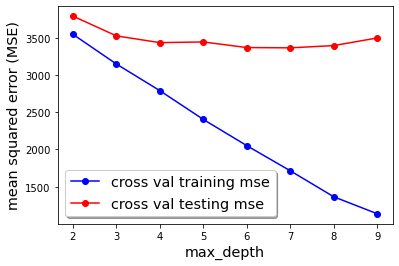

In [97]:
# Plot the cross validation measures (cross_val_train_mse & cross val_test_mse) 
plt.plot(depth_range, cross_val_train_mse, 'bo-', label ='cross val training mse')
plt.plot(depth_range, cross_val_test_mse, 'ro-', label = 'cross val testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [98]:
print('***Final Model***')
xg_reg_final = XGBRegressor(max_depth=6, n_estimators=1500, eta=0.01, subsample=0.5, colsample_bytree= 1.0)
xg_reg_final.fit(x_train, y_train.ravel()) 
print('training RMSE: ', np.sqrt(mean_squared_error(xg_reg_final.predict(x_train), y_train)))
print('testing RMSE: ', np.sqrt(mean_squared_error(xg_reg_final.predict(x_test), y_test)))
    
results  = cross_validate(xg_reg_final, df_x, df_y.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('cross val training RMSE:', np.sqrt(sum(-results['train_score'])/len(results['train_score'])))
print('cross val testing RMSE:', np.sqrt(sum(-results['test_score'])/len(results['test_score'])))

***Final Model***
training RMSE:  35.361393471552354
testing RMSE:  52.133135139553076
cross val training RMSE: 36.25792429410845
cross val testing RMSE: 56.492581127213036


In [99]:
print('R-squared train score: {:.3f}'.format(xg_reg_final.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(xg_reg_final.score(x_test, y_test)))

R-squared train score: 0.826
R-squared test score: 0.618


### Support Vector Regression Model

In [100]:
#Split Train, Test data based on 70/30 split 
x_train,x_test,y_train,y_test=train_test_split(df_x, df_y, test_size=0.3, random_state=105)

#Create support vector regression model
svr_model = svm.SVR(kernel='linear', gamma = 0.001, C = 0.1)

#Fit function adjusts weights according to data values so that better accuracy can be achieved.
svr_model.fit(x_train,y_train.ravel())

SVR(C=0.1, gamma=0.001, kernel='linear')

In [101]:
print('the training Root mean squared error is: ', np.sqrt(mean_squared_error(svr_model.predict(x_train), y_train)))
print('the testing Root mean squared error is: ', np.sqrt(mean_squared_error(svr_model.predict(x_test), y_test)))

the training Root mean squared error is:  69.19129040671439
the testing Root mean squared error is:  69.84753044835783


In [102]:
# Task 3: Evaluate the Model using K-folds Cross validation
results = cross_validate(svr_model, df_x, df_y.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print()
print('cross val training Root mean_squared_error is:', np.sqrt(sum(-results['train_score'])/len(results['train_score'])))
print('cross val testing Root mean_squared_error is:', np.sqrt(sum(-results['test_score'])/len(results['test_score'])))

train_score:  [-4957.68214804 -4734.17695497 -4756.56429163 -4627.08669329
 -4703.47660938]
test_score:  [-4100.48909963 -4705.55476942 -5174.6515314  -5125.8229791
 -5389.2931486 ]

cross val training Root mean_squared_error is: 68.96228925625047
cross val testing Root mean_squared_error is: 69.99401621301931


In [103]:
print('R-squared train score: {:.3f}'.format(svr_model.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(svr_model.score(x_test, y_test)))

R-squared train score: 0.336
R-squared test score: 0.315


In [104]:
# Create Support Vector Regression model
SVR_model = svm.SVR()

# A parameter grid for Support Vector Regression model
params = {'kernel' : ['linear', 'poly'],
          'C' : [1,5,10],
          'degree' : [3,8],
          'coef0' : [0.01,0.5],
        }

#Hyperparameter tuning through randomizedSearchCV
SVR_RandomCV=RandomizedSearchCV(estimator=SVR_model,param_distributions=params, cv = 3, n_jobs = -1, verbose = 2)

#Fit function adjusts weights according to data values so that better accuracy can be achieved.
SVR_RandomCV.fit(df_x, df_y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [1, 5, 10], 'coef0': [0.01, 0.5],
                                        'degree': [3, 8],
                                        'kernel': ['linear', 'poly']},
                   verbose=2)

In [105]:
#get the best score
print('Score: ', SVR_RandomCV.best_score_)

#get the best parameters
print('Parameters: ', SVR_RandomCV.best_params_)

Score:  0.3863471888408327
Parameters:  {'kernel': 'linear', 'degree': 3, 'coef0': 0.01, 'C': 5}


In [106]:
#build support vectore regressor based on optimal parameters obtained from best_params_
SVR_RandomCV = svm.SVR(kernel= 'linear', degree = 8, coef0 = 0.5, C= 5)

#Fit function adjusts weights according to data values so that better accuracy can be achieved.
SVR_RandomCV.fit(x_train, y_train)

SVR(C=5, coef0=0.5, degree=8, kernel='linear')

In [107]:
print('***Final Model***')
print('training RMSE: ', np.sqrt(mean_squared_error(SVR_RandomCV.predict(x_train), y_train)))
print('testing RMSE: ', np.sqrt(mean_squared_error(SVR_RandomCV.predict(x_test), y_test)))

results = cross_validate(SVR_RandomCV, df_x, df_y.ravel(), scoring='neg_mean_squared_error', cv=4, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print()
print('cross val training Root mean_squared_error is:', np.sqrt(sum(-results['train_score'])/len(results['train_score'])))
print('cross val testing Root mean_squared_error is:', np.sqrt(sum(-results['test_score'])/len(results['test_score'])))

***Final Model***
training RMSE:  64.2504841479428
testing RMSE:  64.79270859675061
train_score:  [-4385.95564677 -4088.74417915 -3954.0869559  -4124.28521041]
test_score:  [-3342.23691365 -4569.3232699  -4675.56648085 -4449.10526758]

cross val training Root mean_squared_error is: 64.32937119275637
cross val testing Root mean_squared_error is: 65.26145863366744


In [108]:
print('R-squared train score: {:.3f}'.format(SVR_RandomCV.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(SVR_RandomCV.score(x_test, y_test)))

R-squared train score: 0.427
R-squared test score: 0.410
